# Project - Fundamentals of Data Analysis
***


### References
***
**Box Plot - Subject References**       
    - [Background to box plot] http://www.physics.csbsju.edu/stats/box2.html
    - [Basics of box plot]     https://www.khanacademy.org
    - [History of box plot]    http://vita.had.co.nz/papers/boxplots.pdf
    - [Box plot description]   asq.org/learn-about-quality/data-collection-analysis-tools/overview/box-whisker-plot.html
    
**Technical References**       
    - [Pandas]                            http://pandas.pydata.org/pandas-docs/stable/
    - [Guidence from the forum questions] https://stackoverflow.com
    - [Seaborn documentation]             https://seaborn.pydata.org
***

***
## 1.  History of the box plot and situations in which it used
***
**Box Plot** <br>
The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum. 

***
**1(a):History**<br>

- Early   1950: The basic graphic form of the boxplot called the range-bar, was established.
- Year    1969: John Tukey introduced the box plot as part of his toolkit for exploratory data analysis.
- Year    1996: Few boxplots replaced the extremes with fixed quartiles [2% min and 98% max]
- Year    1988: Vase plot, a variation of box plot, in this box is replaced with a symmetrical display of estimated density.
- Year    1996: High density region box plots were introduced
- Year    1998: Violin plots  a variation of box plot, this display the density for all data points, not just the middle half.
- Year    1998: Bivariate boxplots were introduced
- Year    1999: Few boxplots used semi-interquartile for skewness
- Year    2000: Rotational box plots were introduced
- Year    2001: Midgap plot was proposed to improve the data-ink ratio
- Year    2003: The box-percentile plot displays a modiﬁed empirical cumulative density function (ECDF).
- Year    2006: The letter-value boxplot was designed to overcome the shortcomings of the boxplot for large data.
- 2009 to 2010: Used to display distributional features like kurtosis, skewness,mean, standard error and multimodality 
<br>
***
**1(b):Situations where it is used**<br>


- **Situations** 
        - Where multiple data sets from independent sources that are related to each other in some way. 
        - For identifying outliers and for comparing distributions.
- **Examples** 
        - Test scores between schools or classrooms
        - Data from before and after a process change
        - Data from duplicate machines manufacturing the same products.
        
***

***
## 2 Demonstrate the use of Boxplot
***

- Wine dataset in Sklearn is used to demonstrate the use of boxplot
- Alcohol content data across the 3 classes of wine is used for the data analysis
- Display the boxplot graphs and describe the key stats from the graph

***

In [1]:
# Import the wine data set from the sklearn, pandas and numpy
# Load the wine data set into data frame
# create a dataframe for the alcohol content for the 3 classes of the wine
# convert the 3 clssess of wine into a dataframe column for easy reading and plotting the graphs

from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Define the class lists
# Create a dataframe with 3 columns for 3 different types of wine
Class0,Class1,Class2 =[],[],[]
df_alcohol_class1 = pd.DataFrame(columns=['Class-1'])
df_alcohol_class2 = pd.DataFrame(columns=['Class-2'])
df_alcohol_class3 = pd.DataFrame(columns=['Class-3'])

#Load the wine data and create a dataframe with wine data and add the targes (class of wine)
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Class of wine'] = data['target']
i,y=0,0

#Iterate through the winedata (alochol contect)
#Create a wine class column for each alcohol contect in the dataframe "df_alcohol"
for index, row in df.iterrows():
    if (row['Class of wine'] == 0): 
        df_alcohol_class1.at[index,'Class-1'] = (row['alcohol'])
        Class0.append(row['alcohol'])
for index, row in df.iterrows():
    if (row['Class of wine'] == 1): 
        df_alcohol_class2.at[i,'Class-2'] = (row['alcohol'])
        Class1.append(row['alcohol'])
        i = i+1
for index, row in df.iterrows():
    if (row['Class of wine'] == 2): 
        df_alcohol_class3.at[y,'Class-3'] = (row['alcohol'])
        Class2.append(row['alcohol'])
        y=y+1

#Create a boxplot using different classes of wine
#Use subplot to make 3 graps appear in the straight line
#Assign title for each of the boxplots
#Show the box plots
#Ensure colours are assigned for box outline and the whiskers
#the fliers should be marked "+"

# Subplots - Divide the space amount the 3 graphs
fig, axes = plt.subplots(ncols=3, figsize=(25,3))

Class0.sort()
boxplot0= axes[0].boxplot(Class0)
axes[0].set_title('Wine Type = Class 0')
plt.setp(boxplot0['boxes'], color='black')
plt.setp(boxplot0['whiskers'], color='blue')

Class1.sort()
boxplot1= axes[1].boxplot(Class1)
axes[1].set_title('Wine Type = Class 1')
plt.setp(boxplot1['boxes'], color='green')
plt.setp(boxplot1['whiskers'], color='red')
plt.setp(boxplot1['fliers'], color='royalblue', marker='+')

Class2.sort()
boxplot2= axes[2].boxplot(Class2)
axes[2].set_title('Wine Type = Class 2')
plt.setp(boxplot2['boxes'], color='blue')
plt.setp(boxplot2['whiskers'], color='green')
plt.show()

#bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
#plt.setp(bp['boxes'], color='black')
#plt.setp(bp['whiskers'], color='black')
#plt.setp(bp['fliers'], color='red', marker='+')

#Create function to display the key statistics from the boxplot 
# --- Outlier data points
# --- Boxes data points - Upper quartile, Low quartile and middle quartile
# --- Median data points
# --- Whiskers - upper whisker and lower whisker

def Displayvalues(value):
    print ("\n")
    print ("*** Wine Type:" + value +" - Alcohol Content - Boxplot Stats ***")
    print ("\n")
    print ("The data Outliers of alcohol content in " + value +" wine "+ " : "+ '{0!r}'.format(outliers))
    print ("The BOX values of alcohol content in " + value +" wine    "+ " : "+ '{0!r}'.format(boxes))
    print ("The median data of alcohol content in " + value +" wine   "+ " : "+ '{0!r}'.format(medians))
    print ("The whister data of alcohol content in " + value +" wine  "+ " : "+ '{0!r}'.format(whiskers))
   
#Capture the box plot stats for CLASS 0 wine and call the print function to print the values
outliers = [flier.get_ydata() for flier in boxplot0["fliers"]]
boxes = [box.get_ydata() for box in boxplot0["boxes"]]
medians = [median.get_ydata() for median in boxplot0["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in boxplot0["whiskers"]]
Displayvalues("CLASS0")

# Capture the box plot stats for CLASS 1 wine and call the print function to print the values
outliers = [flier.get_ydata() for flier in boxplot1["fliers"]]
boxes = [box.get_ydata() for box in boxplot1["boxes"]]
medians = [median.get_ydata() for median in boxplot1["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in boxplot1["whiskers"]]
Displayvalues("CLASS1")

# Capture the box plot stats for CLASS 2 wine and call the print function to print the values
outliers = [flier.get_ydata() for flier in boxplot2["fliers"]]
boxes = [box.get_ydata() for box in boxplot2["boxes"]]
medians = [median.get_ydata() for median in boxplot2["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in boxplot2["whiskers"]]
Displayvalues("CLASS2")


<Figure size 2500x300 with 3 Axes>



*** Wine Type:CLASS0 - Alcohol Content - Boxplot Stats ***


The data Outliers of alcohol content in CLASS0 wine  : [array([], dtype=float64)]
The BOX values of alcohol content in CLASS0 wine     : [array([13.4, 13.4, 14.1, 14.1, 13.4])]
The median data of alcohol content in CLASS0 wine    : [array([13.75, 13.75])]
The whister data of alcohol content in CLASS0 wine   : [array([13.4 , 12.85]), array([14.1 , 14.83])]


*** Wine Type:CLASS1 - Alcohol Content - Boxplot Stats ***


The data Outliers of alcohol content in CLASS1 wine  : [array([13.49, 13.67, 13.86])]
The BOX values of alcohol content in CLASS1 wine     : [array([11.915, 11.915, 12.515, 12.515, 11.915])]
The median data of alcohol content in CLASS1 wine    : [array([12.29, 12.29])]
The whister data of alcohol content in CLASS1 wine   : [array([11.915, 11.03 ]), array([12.515, 13.34 ])]


*** Wine Type:CLASS2 - Alcohol Content - Boxplot Stats ***


The data Outliers of alcohol content in CLASS2 wine  : [array([], dtype=float

***
## 3 Explain the terminalogy used in boxplots
***
Key terminalogy used in boxplots and explanation with the wine data example

   - Median
   - Frist quartile
   - third quartile (Tukey boxplot)
   - Whisker
   - percentile Vs quartile

***

***
**Median**
  - The median marks the mid-point of the data and is shown by the line that divides the box into two parts. 
  - Half the scores are greater than or equal to this value and half are less.
**Example**
 - Take the class 1 wine data and sort in Ascending order
 - Take the middle number. If there are 2 numbers, then take the average.
  

In [2]:
# Sort the Class 1 wine dataset
# Print the Alcohol content
print ("\n")
print ("*** Wine Type Class 1: Median ***")
print ("\n")
print ("Length of the dataset                          " + " : "+ '{0!r}'.format(len(Class1)))  
print ("The middle 2 numbers are                       " + " : "+ '{0!r}'.format(np.median( df_alcohol_class2['Class-2'])) )
print ("\n")



*** Wine Type Class 1: Median ***


Length of the dataset                           : 71
The middle 2 numbers are                        : 12.29




***
**Quartile**
   - Quartiles are values that divide data into quarters. 
   - Divide your data into four segments according to where the numbers fall on the number line. The four quarters that divide a data set into quartiles are:
        - The lowest 25% of numbers.
        - The next lowest 25% of numbers (up to the median).
        - The second highest 25% of numbers (above the median).
        - The highest 25% of numbers.

In [3]:
# Function to calculate the Median, Quartile
# The code is re-used based on question in "https://stackoverflow.com/questions/45926230/how-to-calculate-1st-and-3rd-quartiles"
# Q1 and Q3 Quartiles are cacluated based on the below code snippet

#***** Re-Used code set from stackoverflow :: STARTS HERE *******#
def find_median(sorted_list):
    indices = []
    list_size = len(sorted_list)
    median = 0
    if list_size % 2 == 0:
        indices.append(int(list_size / 2) - 1)  # -1 because index starts from 0
        indices.append(int(list_size / 2))
        median = (sorted_list[indices[0]] + sorted_list[indices[1]]) / 2
        pass
    else:
        indices.append(int(list_size / 2))
        median = sorted_list[indices[0]]
        pass
    return median, indices
    pass

#Sort the Class 1 wine dataset
Class1.sort()
median, median_indices = find_median(Class1)
Q1, Q1_indices = find_median(Class1[:median_indices[0]])
Q2, Q2_indices = find_median(Class1[median_indices[-1] + 1:])
quartiles = [Q1, median, Q2]
#***** Re-Used code set from stackoverflow :: ENDS HERE *******#

print ("\n")
print ("*** Wine Type Class 1: Q1, Median and Q3 Quartile ***")
print ("\n")
print ("Length of the dataset                          " + " : "+ '{0!r}'.format(len(Class1)))  
print ("Q1, Median and Q3 Quartile                     " + " : "+ '{0!r}'.format(quartiles))
print ("\n")




*** Wine Type Class 1: Q1, Median and Q3 Quartile ***


Length of the dataset                           : 71
Q1, Median and Q3 Quartile                      : [11.87, 12.29, 12.52]




***
**Percentiles** are 99 points that divide any data set or distribution into 100 equal parts. 
***


In [4]:
print ("\n")
print ("*** Wine Type Class 1: 10%,50% and 90% percentails ***")
print ("\n")
print ("Length of the dataset   " + " : "+ '{0!r}'.format(len(Class1)))  
print ("10 Percentaile          " + " : "+ '{0!r}'.format(df_alcohol_class1["Class-1"].quantile(0.10)))
print ("50 Percentaile          " + " : "+ '{0!r}'.format(df_alcohol_class1["Class-1"].quantile(0.50)))
print ("90 Percentaile          " + " : "+ '{0!r}'.format(df_alcohol_class1["Class-1"].quantile(0.90)))
print ("\n")



*** Wine Type Class 1: 10%,50% and 90% percentails ***


Length of the dataset    : 71
10 Percentaile           : 13.066
50 Percentaile           : 13.75
90 Percentaile           : 14.314




***
## 4. Compare the box plot against other plots
***

- Create box plot for the alcohol content in 3 different classes of wine using seaborn library
- Create Swarm plot and Violin plot for the same dataset using seaborn library
- Mark the observations of the different plots

***

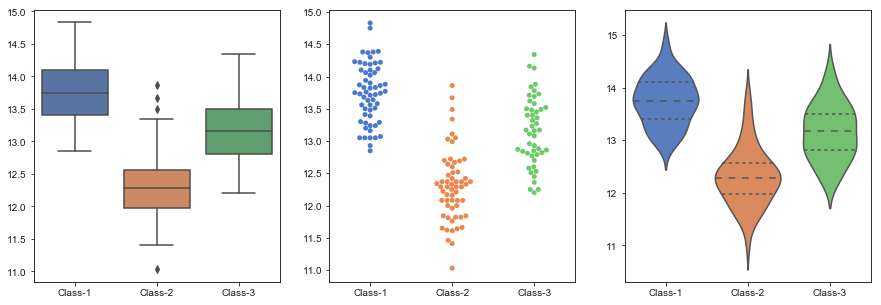

In [5]:
#Creae a dataframe for the alcohol content in 3 classes of wine
#As there are duplicates in the data (alcohol wine content), the individual dataframes are converted into series and 
# stored in dataframe
import seaborn as sns

df_alcohol = pd.DataFrame()
df_alcohol['Class-1'] = df_alcohol_class1['Class-1'].tolist()
df_alcohol['Class-2'] = pd.Series(df_alcohol_class2['Class-2'].tolist())
df_alcohol['Class-3'] = pd.Series(df_alcohol_class3['Class-3'].tolist())
df_alcohol

#Plot Seaborn graphs for data visualisation.
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,5))
sns.set(style="whitegrid")
ax = sns.boxplot(data=df_alcohol, ax=ax1)
ax = sns.swarmplot(data=df_alcohol, color=".25", palette="muted", ax=ax2)
ax = sns.violinplot(data=df_alcohol, color=".7", palette="muted", inner="quartile",  scale="count", ax=ax3)

***
**Observations:** <br>

**Violin Plot**
    - Violin plot similar to box and the inner quartiles can be shown as above.
    - Shows the distribution of quantitative data.
    - Box plot uses actual datapoints but the violin plot features a density estimation of the underlying distribution
**Swarm Plot**
    - A swarm plot can be drawn on its own, but it is a good complement to a box or violin plot 
    - Show all observations along with underlying distribution.
***

## END